In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read data
df = pd.read_csv('./dataset/cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Data cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [6]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

In [7]:
# check for duplicate values
df.duplicated().sum()

0

## EDA 

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

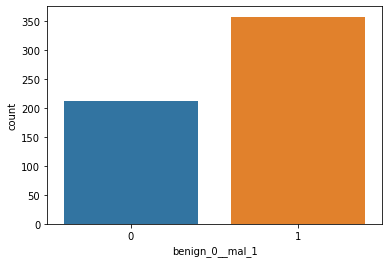

In [8]:
sns.countplot(x='benign_0__mal_1',data=df)

## Feature engineering

<AxesSubplot:>

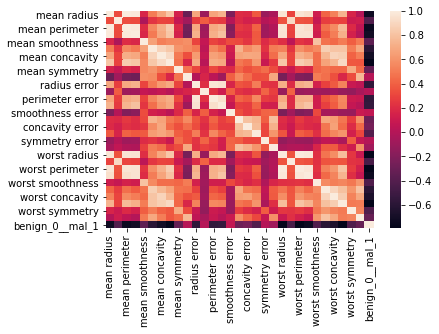

In [9]:
sns.heatmap(df.corr())

In [10]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<AxesSubplot:>

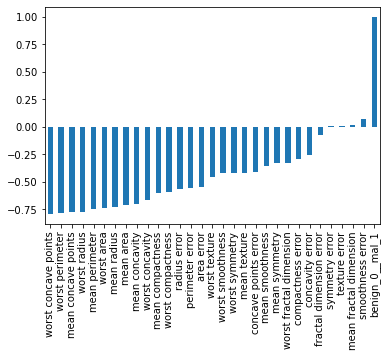

In [11]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<AxesSubplot:>

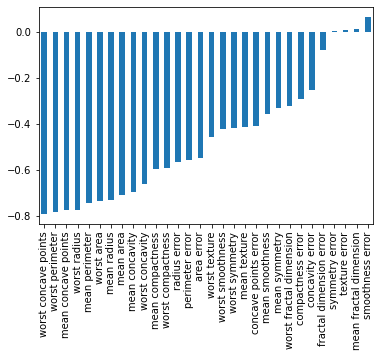

In [12]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

In [13]:
# feature data
feature_data = df.drop('benign_0__mal_1',axis=1).values
# label data
label_data = df['benign_0__mal_1'].values

## Train test split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# x_train,X_test -> feature data
# y_train,y_test -> label data
X_train,X_test,y_train,y_test = train_test_split(feature_data,label_data,test_size=0.2,random_state=101)

In [16]:
y_test

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0], dtype=int64)

## Scaling 

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scale = MinMaxScaler()

In [19]:
scale.fit(X_train)

MinMaxScaler()

In [20]:
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

In [21]:
X_test

array([[0.25457901, 0.29861346, 0.24338332, ..., 0.29010309, 0.27951902,
        0.11025843],
       [0.33409059, 0.21203923, 0.31780803, ..., 0.25611684, 0.22866154,
        0.11347239],
       [0.28060959, 0.22387555, 0.26770783, ..., 0.28298969, 0.28760103,
        0.09477896],
       ...,
       [0.20346443, 0.12445046, 0.20185198, ..., 0.29591065, 0.10585452,
        0.08395645],
       [0.37337309, 0.35508962, 0.36161979, ..., 0.34948454, 0.1584861 ,
        0.07182212],
       [0.53192295, 0.30977342, 0.517656  , ..., 0.61030928, 0.24581116,
        0.17670209]])

## Creating model

In [22]:
import tensorflow as tf

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout

In [25]:
X_train.shape

(455, 30)

In [26]:
# activation function in output layer - binary class[0,1] -> sigmoid
#                                     - Multilabel class[0,1,2,3,4,5....] -> softmax
# intialize model
model = Sequential()
# input 1ayer
model.add(Dense(units=30,activation='relu'))
# one hidden layer
model.add(Dense(units=15,activation='relu'))
# output layer
model.add(Dense(units=1,activation='sigmoid'))

In [27]:
# Loss function binary class - binary_crossentropy 
#               multilabel - categorical_crossentropy
model.compile(loss='binary_crossentropy',optimizer='adam')

In [28]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),verbose=1)

Epoch 1/600
15/15 [==============================] - 2s 40ms/step - loss: 0.6767 - val_loss: 0.6663
Epoch 2/600
15/15 [==============================] - 0s 9ms/step - loss: 0.6587 - val_loss: 0.6490
Epoch 3/600
15/15 [==============================] - 0s 8ms/step - loss: 0.6390 - val_loss: 0.6269
Epoch 4/600
15/15 [==============================] - 0s 8ms/step - loss: 0.6139 - val_loss: 0.5971
Epoch 5/600
15/15 [==============================] - 0s 8ms/step - loss: 0.5730 - val_loss: 0.5470
Epoch 6/600
15/15 [==============================] - 0s 8ms/step - loss: 0.5221 - val_loss: 0.4939
Epoch 7/600
15/15 [==============================] - 0s 8ms/step - loss: 0.4702 - val_loss: 0.4430
Epoch 8/600
15/15 [==============================] - 0s 7ms/step - loss: 0.4184 - val_loss: 0.3902
Epoch 9/600
15/15 [==============================] - 0s 8ms/step - loss: 0.3709 - val_loss: 0.3431
Epoch 10/600
15/15 [==============================] - 0s 8ms/step - loss: 0.3263 - val_loss: 0.3015
Epoch 11

Epoch 83/600
15/15 [==============================] - 0s 10ms/step - loss: 0.0523 - val_loss: 0.0943
Epoch 84/600
15/15 [==============================] - 0s 8ms/step - loss: 0.0544 - val_loss: 0.1060
Epoch 85/600
15/15 [==============================] - 0s 6ms/step - loss: 0.0561 - val_loss: 0.0942
Epoch 86/600
15/15 [==============================] - 0s 9ms/step - loss: 0.0564 - val_loss: 0.0971
Epoch 87/600
15/15 [==============================] - 0s 8ms/step - loss: 0.0520 - val_loss: 0.0978
Epoch 88/600
15/15 [==============================] - 0s 6ms/step - loss: 0.0507 - val_loss: 0.1001
Epoch 89/600
15/15 [==============================] - 0s 8ms/step - loss: 0.0491 - val_loss: 0.0964
Epoch 90/600
15/15 [==============================] - 0s 7ms/step - loss: 0.0487 - val_loss: 0.0989
Epoch 91/600
15/15 [==============================] - 0s 7ms/step - loss: 0.0509 - val_loss: 0.0986
Epoch 92/600
15/15 [==============================] - 0s 7ms/step - loss: 0.0473 - val_loss: 0.0991

15/15 [==============================] - 0s 7ms/step - loss: 0.0277 - val_loss: 0.1656
Epoch 246/600
15/15 [==============================] - 0s 6ms/step - loss: 0.0265 - val_loss: 0.1593
Epoch 247/600
15/15 [==============================] - 0s 6ms/step - loss: 0.0272 - val_loss: 0.1701
Epoch 248/600
15/15 [==============================] - 0s 7ms/step - loss: 0.0270 - val_loss: 0.1635
Epoch 249/600
15/15 [==============================] - 0s 6ms/step - loss: 0.0261 - val_loss: 0.1643
Epoch 250/600
15/15 [==============================] - 0s 7ms/step - loss: 0.0281 - val_loss: 0.1611
Epoch 251/600
15/15 [==============================] - 0s 7ms/step - loss: 0.0259 - val_loss: 0.1722
Epoch 252/600
15/15 [==============================] - 0s 7ms/step - loss: 0.0273 - val_loss: 0.1652
Epoch 253/600
15/15 [==============================] - 0s 7ms/step - loss: 0.0257 - val_loss: 0.1639
Epoch 254/600
15/15 [==============================] - 0s 7ms/step - loss: 0.0267 - val_loss: 0.1752
Epoc

15/15 [==============================] - 0s 8ms/step - loss: 0.0159 - val_loss: 0.2531
Epoch 408/600
15/15 [==============================] - 0s 8ms/step - loss: 0.0171 - val_loss: 0.2711
Epoch 409/600
15/15 [==============================] - 0s 8ms/step - loss: 0.0177 - val_loss: 0.2502
Epoch 410/600
15/15 [==============================] - 0s 8ms/step - loss: 0.0166 - val_loss: 0.2597
Epoch 411/600
15/15 [==============================] - 0s 8ms/step - loss: 0.0171 - val_loss: 0.2467
Epoch 412/600
15/15 [==============================] - 0s 10ms/step - loss: 0.0218 - val_loss: 0.2975
Epoch 413/600
15/15 [==============================] - 0s 9ms/step - loss: 0.0206 - val_loss: 0.2499
Epoch 414/600
15/15 [==============================] - 0s 9ms/step - loss: 0.0178 - val_loss: 0.2704
Epoch 415/600
15/15 [==============================] - 0s 7ms/step - loss: 0.0178 - val_loss: 0.2557
Epoch 416/600
15/15 [==============================] - 0s 7ms/step - loss: 0.0170 - val_loss: 0.2635
Epo

15/15 [==============================] - 0s 7ms/step - loss: 0.0097 - val_loss: 0.3646
Epoch 570/600
15/15 [==============================] - 0s 9ms/step - loss: 0.0117 - val_loss: 0.3351
Epoch 571/600
15/15 [==============================] - 0s 9ms/step - loss: 0.0098 - val_loss: 0.3489
Epoch 572/600
15/15 [==============================] - 0s 9ms/step - loss: 0.0089 - val_loss: 0.3443
Epoch 573/600
15/15 [==============================] - 0s 7ms/step - loss: 0.0085 - val_loss: 0.3541
Epoch 574/600
15/15 [==============================] - 0s 8ms/step - loss: 0.0090 - val_loss: 0.3429
Epoch 575/600
15/15 [==============================] - 0s 9ms/step - loss: 0.0086 - val_loss: 0.3618
Epoch 576/600
15/15 [==============================] - 0s 9ms/step - loss: 0.0086 - val_loss: 0.3497
Epoch 577/600
15/15 [==============================] - 0s 8ms/step - loss: 0.0095 - val_loss: 0.3601
Epoch 578/600
15/15 [==============================] - 0s 9ms/step - loss: 0.0081 - val_loss: 0.3689
Epoc

In [30]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

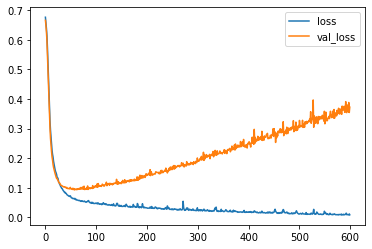

In [31]:
model_loss.plot()

In [32]:
# The above model is overfitting so importing earlystopping
from tensorflow.keras.callbacks import EarlyStopping

## Adding Dropout layer

In [33]:
model = Sequential()
# input 1ayer
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))
# one hidden layer
model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))
# output layer
model.add(Dense(units=1,activation='sigmoid'))

In [34]:
early = EarlyStopping(monitor = 'val_loss',mode='min',patience=20,verbose=1)

In [35]:
model.compile(loss='binary_crossentropy',optimizer='adam')

In [36]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),verbose=1,callbacks=[early])

Epoch 1/600
15/15 [==============================] - 2s 32ms/step - loss: 0.7077 - val_loss: 0.6899
Epoch 2/600
15/15 [==============================] - 0s 10ms/step - loss: 0.7005 - val_loss: 0.6875
Epoch 3/600
15/15 [==============================] - 0s 9ms/step - loss: 0.6786 - val_loss: 0.6818
Epoch 4/600
15/15 [==============================] - 0s 7ms/step - loss: 0.6822 - val_loss: 0.6749
Epoch 5/600
15/15 [==============================] - 0s 8ms/step - loss: 0.6669 - val_loss: 0.6650
Epoch 6/600
15/15 [==============================] - 0s 8ms/step - loss: 0.6684 - val_loss: 0.6545
Epoch 7/600
15/15 [==============================] - 0s 7ms/step - loss: 0.6458 - val_loss: 0.6352
Epoch 8/600
15/15 [==============================] - 0s 8ms/step - loss: 0.6346 - val_loss: 0.6132
Epoch 9/600
15/15 [==============================] - 0s 9ms/step - loss: 0.6025 - val_loss: 0.5862
Epoch 10/600
15/15 [==============================] - 0s 8ms/step - loss: 0.5906 - val_loss: 0.5632
Epoch 1

Epoch 83/600
15/15 [==============================] - 0s 9ms/step - loss: 0.1278 - val_loss: 0.0940
Epoch 84/600
15/15 [==============================] - 0s 7ms/step - loss: 0.1303 - val_loss: 0.0805
Epoch 85/600
15/15 [==============================] - 0s 7ms/step - loss: 0.1309 - val_loss: 0.0815
Epoch 86/600
15/15 [==============================] - 0s 10ms/step - loss: 0.1341 - val_loss: 0.0861
Epoch 87/600
15/15 [==============================] - 0s 7ms/step - loss: 0.1437 - val_loss: 0.0820
Epoch 88/600
15/15 [==============================] - 0s 7ms/step - loss: 0.1260 - val_loss: 0.0752
Epoch 89/600
15/15 [==============================] - 0s 8ms/step - loss: 0.1460 - val_loss: 0.0870
Epoch 90/600
15/15 [==============================] - 0s 11ms/step - loss: 0.1426 - val_loss: 0.0763
Epoch 91/600
15/15 [==============================] - 0s 10ms/step - loss: 0.1337 - val_loss: 0.0756
Epoch 92/600
15/15 [==============================] - 0s 9ms/step - loss: 0.1342 - val_loss: 0.07

In [37]:
model_hist = pd.DataFrame(model.history.history)

<AxesSubplot:>

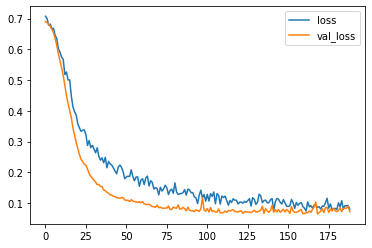

In [38]:
model_hist.plot()

## Model Evalution

In [54]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

In [56]:
y_pred

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
    

In [50]:
from sklearn.metrics import classification_report,confusion_matrix

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [57]:
print(confusion_matrix(y_test,y_pred))

[[41  1]
 [ 1 71]]
